## Massey ordinals Over time

I reduced the size of the massey file in Making Massey Smaller.csv so that I can upload it to github
Here Iw ill continue the process of turning the weekly rankings into 3 or so snapshots of each season.

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import random

In [2]:
os.chdir('C:\\Users\\Nick\\Python Projects\\2024 March Madness\\MMML')

In [3]:
Massey = pd.read_csv('Data\\newMassey.csv')

In [4]:
Massey.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,37,MOR,1102,110
1,2003,37,MOR,1103,179
2,2003,37,MOR,1104,13
3,2003,37,MOR,1105,262
4,2003,37,MOR,1106,272


In [7]:
grouped_data = Massey.groupby(['SystemName', 'Season', 'RankingDayNum']).size().reset_index(name='Counts')

In [8]:
grouped_data.columns

Index(['SystemName', 'Season', 'RankingDayNum', 'Counts'], dtype='object')

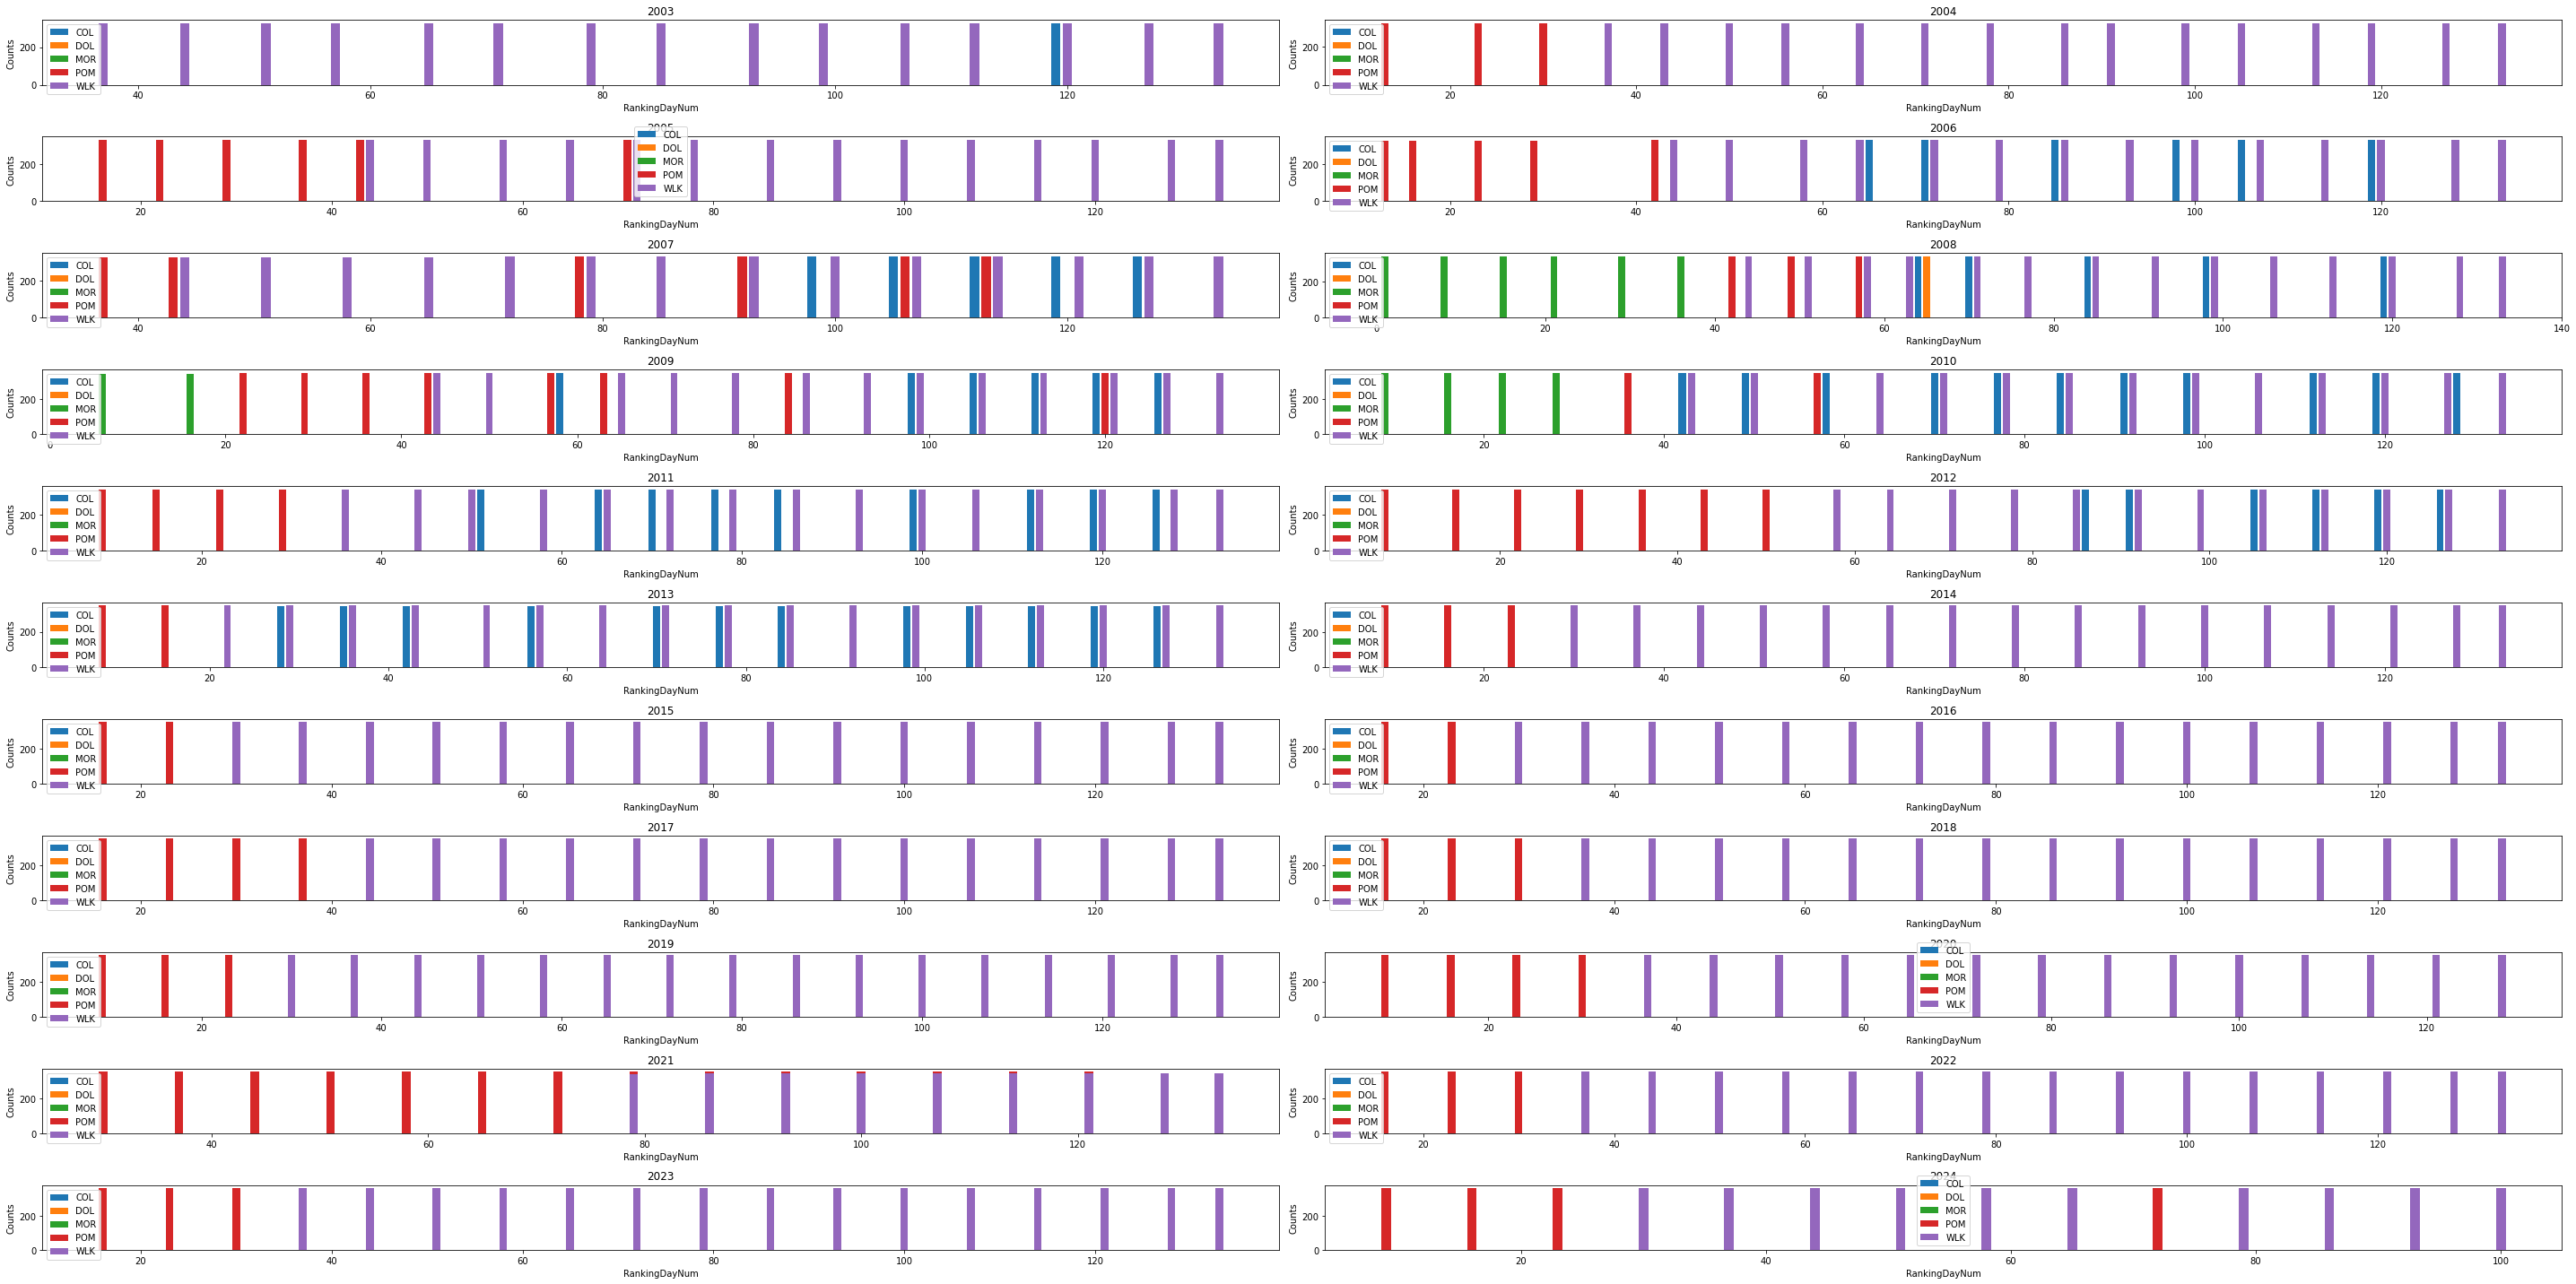

In [12]:
import matplotlib.pyplot as plt

# Example DataFrame
# Assuming you have your DataFrame named 'df'

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(40, 20))

# Iterate over each season
for i, season in enumerate(grouped_data['Season'].unique()):
    # Filter DataFrame for the current season
    season_df = grouped_data[grouped_data['Season'] == season]
    
    # Iterate over each system and plot its counts for RankingDayNum
    for j, system in enumerate(season_df['SystemName'].unique()):
        system_df = season_df[season_df['SystemName'] == system]
        axes[i//2, i%2].bar(system_df['RankingDayNum'], system_df['Counts'], label=system)
        
    # Set title and labels for each subplot
    axes[i//2, i%2].set_title(season)
    axes[i//2, i%2].set_xlabel('RankingDayNum')
    axes[i//2, i%2].set_ylabel('Counts')
    axes[i//2, i%2].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()